In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("data/age_gender.csv")

In [3]:
data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [4]:
data = data.drop("img_name", axis=1)

In [5]:
data["age"] = pd.qcut(data["age"], q=8, labels=[0, 1, 2, 3, 4, 5, 6, 7])

In [6]:
#Getting lenght of each row pixels
print(len(data["pixels"][0].split(' ')))

2304


In [7]:
#Saying its a square we take root for size
print(np.sqrt(2304))

48.0


In [8]:
num_pixels = 2304
img_size = 48

In [9]:
#Split into X and y
target_columns = ["age", "ethnicity", "gender"]

y = data[target_columns]
X = data.drop(target_columns, axis=1)

In [10]:
#Convert into pandas
X = pd.Series(X["pixels"])
#Split string into each pixel
X = X.apply(lambda x: x.split(' '))

In [11]:
#Converting back into int array numpy
X = X.apply(lambda x: np.array(list(map(lambda z: np.int32(z), x))))

In [12]:
X = np.array(X)

In [13]:
X = np.stack(np.array(X), axis=0)

In [14]:
#Make into image array
X = np.reshape(X, (-1, 48, 48))

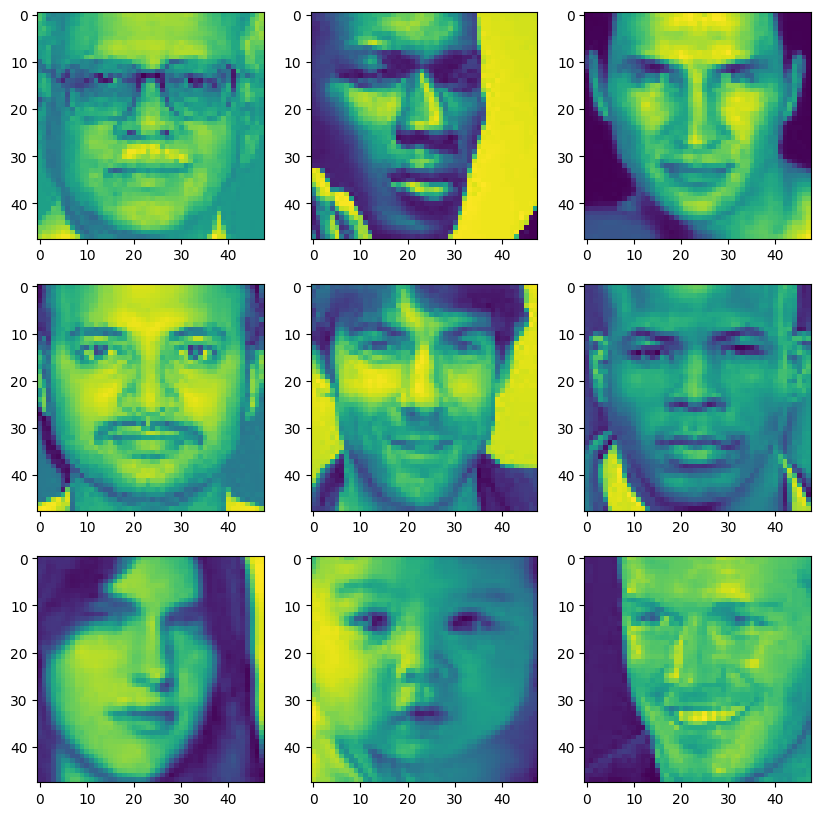

In [15]:
plt.figure(figsize=(10, 10))

for index, image in enumerate(np.random.randint(0, 23705, 9)):
    plt.subplot(3, 3, index +1)
    plt.imshow(X[image])
    
plt.show()

In [16]:
#Extract Each category
y_gender = np.array(y["gender"])
y_ethnicity = np.array(y["ethnicity"])
y_age = np.array(y["age"])

In [17]:
def build_model(nr_of_classes, activation="softmax", loss="sparse_categorical_crossentropy"):
    
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(img_size, img_size, 1)))
    model.add(tf.keras.layers.Rescaling(1./255))
    model.add(tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    
    model.add(tf.keras.layers.Dense(nr_of_classes, activation=activation))
    
    model.compile(
        optimizer="adam",
        loss=loss,
        metrics=["accuracy"]
    )
    
    return model

In [18]:
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, train_size=0.7)

In [19]:
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X, y_age, train_size=0.7)

In [20]:
X_ethnicity_train, X_ethnicity_test, y_ethnicity_train, y_ethnicity_test = train_test_split(X, y_ethnicity, train_size=0.7)

In [21]:
gender_model = build_model(1, activation="sigmoid", loss="binary_crossentropy")

gender_status = gender_model.fit(
    X_gender_train,
    y_gender_train,
    validation_split=0.2,
    batch_size=64,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )],
    verbose=1
)

Epoch 1/20
208/208 [==============================] - 6s 8ms/step - loss: 0.5273 - accuracy: 0.7327 - val_loss: 0.4074 - val_accuracy: 0.8189
Epoch 2/20
208/208 [==============================] - 1s 6ms/step - loss: 0.3623 - accuracy: 0.8359 - val_loss: 0.3390 - val_accuracy: 0.8463
Epoch 3/20
208/208 [==============================] - 1s 7ms/step - loss: 0.3199 - accuracy: 0.8608 - val_loss: 0.3052 - val_accuracy: 0.8650
Epoch 4/20
208/208 [==============================] - 1s 7ms/step - loss: 0.2946 - accuracy: 0.8699 - val_loss: 0.3062 - val_accuracy: 0.8650
Epoch 5/20
208/208 [==============================] - 1s 7ms/step - loss: 0.2687 - accuracy: 0.8840 - val_loss: 0.2894 - val_accuracy: 0.8689
Epoch 6/20
208/208 [==============================] - 2s 7ms/step - loss: 0.2537 - accuracy: 0.8902 - val_loss: 0.2844 - val_accuracy: 0.8747
Epoch 7/20
208/208 [==============================] - 2s 8ms/step - loss: 0.2390 - accuracy: 0.8989 - val_loss: 0.2794 - val_accuracy: 0.8816
Epoch 

In [24]:
age_model = build_model(8)

age_status = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=64,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )],
    verbose=1
)

Epoch 1/20
208/208 [==============================] - 2s 8ms/step - loss: 1.9633 - accuracy: 0.2250 - val_loss: 1.6997 - val_accuracy: 0.3344
Epoch 2/20
208/208 [==============================] - 1s 7ms/step - loss: 1.6850 - accuracy: 0.3353 - val_loss: 1.5679 - val_accuracy: 0.3848
Epoch 3/20
208/208 [==============================] - 1s 7ms/step - loss: 1.5762 - accuracy: 0.3768 - val_loss: 1.5149 - val_accuracy: 0.4037
Epoch 4/20
208/208 [==============================] - 1s 6ms/step - loss: 1.5148 - accuracy: 0.4049 - val_loss: 1.4480 - val_accuracy: 0.4309
Epoch 5/20
208/208 [==============================] - 1s 6ms/step - loss: 1.4650 - accuracy: 0.4167 - val_loss: 1.4209 - val_accuracy: 0.4333
Epoch 6/20
208/208 [==============================] - 1s 6ms/step - loss: 1.4303 - accuracy: 0.4262 - val_loss: 1.4181 - val_accuracy: 0.4342
Epoch 7/20
208/208 [==============================] - 1s 7ms/step - loss: 1.4022 - accuracy: 0.4424 - val_loss: 1.3862 - val_accuracy: 0.4471
Epoch 

In [25]:
y_ethnicity.min()

0

In [26]:
y_ethnicity.max()

4

In [27]:
ethnicity_model = build_model(5)

ethnicity_status = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=64,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )],
    verbose=1
)

Epoch 1/20
208/208 [==============================] - 2s 8ms/step - loss: 1.3331 - accuracy: 0.4803 - val_loss: 1.1330 - val_accuracy: 0.5538
Epoch 2/20
208/208 [==============================] - 1s 6ms/step - loss: 1.0336 - accuracy: 0.6206 - val_loss: 0.9399 - val_accuracy: 0.6565
Epoch 3/20
208/208 [==============================] - 1s 6ms/step - loss: 0.8960 - accuracy: 0.6868 - val_loss: 0.8296 - val_accuracy: 0.7089
Epoch 4/20
208/208 [==============================] - 1s 6ms/step - loss: 0.8228 - accuracy: 0.7130 - val_loss: 0.7971 - val_accuracy: 0.7180
Epoch 5/20
208/208 [==============================] - 1s 6ms/step - loss: 0.7779 - accuracy: 0.7299 - val_loss: 0.7513 - val_accuracy: 0.7373
Epoch 6/20
208/208 [==============================] - 1s 6ms/step - loss: 0.7303 - accuracy: 0.7491 - val_loss: 0.7457 - val_accuracy: 0.7397
Epoch 7/20
208/208 [==============================] - 1s 7ms/step - loss: 0.6912 - accuracy: 0.7637 - val_loss: 0.7336 - val_accuracy: 0.7454
Epoch 

In [28]:
gender_model.save("models/gender_model.h5")

In [29]:
age_model.save("models/age_model.h5")

In [30]:
ethnicity_model.save("models/ethnicity_model.h5")

In [31]:
gender_test_prediction = gender_model.predict(X_gender_test)

223/223 [==============================] - 1s 2ms/step


In [32]:
for i in range(len(gender_test_prediction)):
    if gender_test_prediction[i] < 0.5:
        gender_test_prediction[i] = 0
    else:
        gender_test_prediction[i] = 1

In [33]:
gender_test_prediction

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [34]:
print(y_gender_test)

[1 0 1 ... 0 1 0]


In [35]:
print(accuracy_score(y_gender_test,gender_test_prediction))

0.8934195725534309


In [36]:
for i in range(len(gender_test_prediction)):
    if gender_test_prediction[i] < 0.5:
        gender_test_prediction[i] = 0
    else:
        gender_test_prediction[i] = 1

In [37]:
gender_test_prediction

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [38]:
print(y_gender_test)

[1 0 1 ... 0 1 0]


In [39]:
print(accuracy_score(y_gender_test,gender_test_prediction))

0.8934195725534309
